# Pandas Time Series Analysis 3: Holidays  


#### Source:

URL: https://youtu.be/Fo0IMzfcnQE  

Base URL: https://github.com/codebasics/py

https://github.com/codebasics/py/blob/master/pandas/16_ts_holidays/pandas_ts_holidays_custombusinessday.ipynb  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:

df = pd.read_csv("../data_sets/aapl_no_dates.csv")
df.head()

,Open,High,Low,Close,Volume
0,144.88,145.30,143.10,143.50,14277848
1,143.69,144.79,142.72,144.09,21569557
2,143.02,143.50,142.41,142.73,24128782
3,142.90,144.75,142.90,144.18,19201712
4,144.11,145.95,143.37,145.06,21090636


In [4]:
rng = pd.date_range(start="7/1/2017", end="7/21/2017", freq='B')
rng

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='B')

In [5]:
# Using 'B' frequency is not going to help because 4th July was holiday and 'B' is not taking that into account. It only accounts for weekends
df.set_index(rng)

ValueError: Length mismatch: Expected 14 rows, received array of length 15

In [6]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

usa_cal=CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [7]:
rng = pd.date_range(start="7/1/2017", end="7/21/2017", freq=usa_cal)
rng

DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='C')

In [8]:
df.set_index(rng,inplace=True)
df.head()

,Open,High,Low,Close,Volume
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-10,144.11,145.95,143.37,145.06,21090636


# My Custom Calendar

In [9]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday
class myCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday("Gokul's Birth Day", month=5, day=14),#, observance=nearest_workday),
    ]
    
my_bday = CustomBusinessDay(calendar=myCalendar())
pd.date_range('5/1/2020','5/31/2020',freq=my_bday)

DatetimeIndex(['2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-15', '2020-05-18', '2020-05-19',
               '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29'],
              dtype='datetime64[ns]', freq='C')

In [10]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday
class myCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('Someone"s Birth Day', month=5, day=16, observance=nearest_workday),#, observance=nearest_workday),
    ]
    
my_bday = CustomBusinessDay(calendar=myCalendar())
pd.date_range('5/1/2020','5/31/2020',freq=my_bday)

DatetimeIndex(['2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-18', '2020-05-19',
               '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29'],
              dtype='datetime64[ns]', freq='C')

In [11]:
egypt_weekdays = "Sun Mon Tue Wed Thu"

egypt_B= CustomBusinessDay(weekmask=egypt_weekdays)

pd.date_range(start="10/1/2020",periods=20,freq=egypt_B)

DatetimeIndex(['2020-10-01', '2020-10-04', '2020-10-05', '2020-10-06',
               '2020-10-07', '2020-10-08', '2020-10-11', '2020-10-12',
               '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-18',
               '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22',
               '2020-10-25', '2020-10-26', '2020-10-27', '2020-10-28'],
              dtype='datetime64[ns]', freq='C')

In [12]:
from datetime import datetime
dt = datetime(2017,7,9)
dt

datetime.datetime(2017, 7, 9, 0, 0)

In [13]:
dt+1*egypt_B

Timestamp('2017-07-10 00:00:00')

# pd.to_datetime Conversions
https://youtu.be/igWjq3jtLYI

In [14]:
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dates)

DatetimeIndex(['2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-05', '2017-01-05'],
              dtype='datetime64[ns]', freq=None)

In [15]:
dt = ['2017-01-05 2:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2016', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dt)

DatetimeIndex(['2017-01-05 14:30:00', '2017-01-05 14:30:00',
               '2016-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

### European style dates with day first

In [16]:
pd.to_datetime('30-12-2016')

Timestamp('2016-12-30 00:00:00')

In [17]:
pd.to_datetime('5-1-2016')

Timestamp('2016-05-01 00:00:00')

In [18]:
pd.to_datetime('5-1-2016', dayfirst=True)

Timestamp('2016-01-05 00:00:00')

In [19]:
pd.to_datetime('2017$01$05', format='%Y$%m$%d')

Timestamp('2017-01-05 00:00:00')

In [20]:
# pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc']) default throws error

In [21]:
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='ignore')

Index(['2017-01-05', 'Jan 6, 2017', 'abc'], dtype='object')

In [22]:
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='coerce')

DatetimeIndex(['2017-01-05', '2017-01-06', 'NaT'], dtype='datetime64[ns]', freq=None)

# Epoch

In [23]:
current_epoch = 1501324478
pd.to_datetime(current_epoch, unit='s')

Timestamp('2017-07-29 10:34:38')

In [24]:
pd.to_datetime(current_epoch*1000, unit='ms')

Timestamp('2017-07-29 10:34:38')

In [25]:
t = pd.to_datetime([current_epoch], unit='s')
t

DatetimeIndex(['2017-07-29 10:34:38'], dtype='datetime64[ns]', freq=None)

In [26]:
t.view('int64')

array([1501324478000000000], dtype=int64)

# 5: Period and PeriodIndex


https://youtu.be/3l9YOS4y24Y

In [27]:
y = pd.Period('2016')
y

Period('2016', 'A-DEC')

In [28]:
y.start_time

Timestamp('2016-01-01 00:00:00')

In [29]:
y.end_time

Timestamp('2016-12-31 23:59:59.999999999')

In [30]:
y.is_leap_year

True

### Monthly

In [31]:
m = pd.Period('2017-12')
m


Period('2017-12', 'M')

In [32]:

m.start_time



Timestamp('2017-12-01 00:00:00')

In [33]:
m.end_time


Timestamp('2017-12-31 23:59:59.999999999')

In [34]:
m+1

Period('2018-01', 'M')

### Daily Period

In [35]:
d = pd.Period('2016-02-28', freq='D')
d

Period('2016-02-28', 'D')

In [36]:
d.start_time

Timestamp('2016-02-28 00:00:00')

In [37]:
d.end_time

Timestamp('2016-02-28 23:59:59.999999999')

In [38]:
d+1

Period('2016-02-29', 'D')

### Hourly Period

In [39]:
h = pd.Period('2017-08-15 23:00:00',freq='H')
h

Period('2017-08-15 23:00', 'H')

In [40]:
h+1

Period('2017-08-16 00:00', 'H')

In [41]:
h.start_time,h.end_time

(Timestamp('2017-08-15 23:00:00'), Timestamp('2017-08-15 23:59:59.999999999'))

In [42]:
h+pd.offsets.Hour(2)

Period('2017-08-16 01:00', 'H')

### Quarterly Period

In [43]:
q1= pd.Period('2017Q1', freq='Q-JAN')
q1

Period('2017Q1', 'Q-JAN')

In [44]:
q1.start_time,q1.end_time

(Timestamp('2016-02-01 00:00:00'), Timestamp('2016-04-30 23:59:59.999999999'))

In [45]:
q1+1

Period('2017Q2', 'Q-JAN')

#### frequency conversion

In [46]:
q1.asfreq('M',how='start')

Period('2016-02', 'M')

In [47]:
q1.asfreq('M',how='end')

Period('2016-04', 'M')

### Weekly Period

In [48]:
w = pd.Period('2017-07-05',freq='W')
w

Period('2017-07-03/2017-07-09', 'W-SUN')

In [49]:
w-1

Period('2017-06-26/2017-07-02', 'W-SUN')

In [50]:
w2 = pd.Period('2017-08-15',freq='W')
w2

Period('2017-08-14/2017-08-20', 'W-SUN')

In [51]:
w2-w

<6 * Weeks: weekday=6>

### PeriodIndex and period_range

In [52]:
r = pd.period_range('2011', '2017', freq='q')
r

PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
             '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
             '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4',
             '2017Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [53]:
r[0].start_time

Timestamp('2011-01-01 00:00:00')

In [54]:
r[0].end_time

Timestamp('2011-03-31 23:59:59.999999999')

- Walmart's fiscal year ends in Jan, below is how you generate walmart's fiscal quarters between 2011 and 2017

In [55]:
r = pd.period_range('2011', '2017', freq='q-jan')
r

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
             '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1',
             '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
             '2017Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [56]:
r[0].start_time,r[0].end_time  # january ended year has quarter with (Q- Nov|Dec|Jan)

(Timestamp('2010-11-01 00:00:00'), Timestamp('2011-01-31 23:59:59.999999999'))

In [57]:
r = pd.period_range('2016-01', freq='3M', periods=10)
r

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10', '2018-01', '2018-04'],
            dtype='period[3M]', freq='3M')

In [58]:
import numpy as np

In [59]:
idx = pd.period_range('2011', periods=10, freq='q-jan')
ps=pd.Series(np.random.randn(len(idx)),idx)
ps

2011Q4   -0.725543
2012Q1   -0.786387
2012Q2    0.868551
2012Q3   -0.035087
2012Q4    2.048252
2013Q1    0.274360
2013Q2   -0.467533
2013Q3   -1.164849
2013Q4   -0.198221
2014Q1   -1.197859
Freq: Q-JAN, dtype: float64

In [60]:
ps.index

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [61]:
ps['2011':'2013']

2011Q4   -0.725543
2012Q1   -0.786387
2012Q2    0.868551
2012Q3   -0.035087
2012Q4    2.048252
2013Q1    0.274360
2013Q2   -0.467533
2013Q3   -1.164849
2013Q4   -0.198221
2014Q1   -1.197859
Freq: Q-JAN, dtype: float64

In [62]:
pst=ps.to_timestamp()
pst

2010-11-01   -0.725543
2011-02-01   -0.786387
2011-05-01    0.868551
2011-08-01   -0.035087
2011-11-01    2.048252
2012-02-01    0.274360
2012-05-01   -0.467533
2012-08-01   -1.164849
2012-11-01   -0.198221
2013-02-01   -1.197859
Freq: QS-NOV, dtype: float64

In [63]:
pst.index

DatetimeIndex(['2010-11-01', '2011-02-01', '2011-05-01', '2011-08-01',
               '2011-11-01', '2012-02-01', '2012-05-01', '2012-08-01',
               '2012-11-01', '2013-02-01'],
              dtype='datetime64[ns]', freq='QS-NOV')

In [64]:
pst.to_period()

2010Q4   -0.725543
2011Q1   -0.786387
2011Q2    0.868551
2011Q3   -0.035087
2011Q4    2.048252
2012Q1    0.274360
2012Q2   -0.467533
2012Q3   -1.164849
2012Q4   -0.198221
2013Q1   -1.197859
Freq: Q-DEC, dtype: float64

In [65]:
df_wmt=pd.read_csv('../data_sets/wmt.csv')
df_wmt

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [66]:
df_wmt.set_index('Line Item',inplace=True)

In [67]:
df_wmt

,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
Line Item,,,,,
Revenue,115904,120854,118179,130936,117542
Expenses,86544,89485,87484,97743,87688
Profit,29360,31369,30695,33193,29854


In [68]:
df_wmt=df_wmt.T

In [69]:
df_wmt

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [70]:
df_wmt.index

Index(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')

In [71]:
df_wmt.index=pd.PeriodIndex(df_wmt.index,freq='Q-Jan')
df_wmt.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

In [72]:
df_wmt

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [73]:
df_wmt['Start Date']=df_wmt.index.map(lambda x: x.start_time)
df_wmt

Line Item,Revenue,Expenses,Profit,Start Date
2017Q1,115904,86544,29360,2016-02-01
2017Q2,120854,89485,31369,2016-05-01
2017Q3,118179,87484,30695,2016-08-01
2017Q4,130936,97743,33193,2016-11-01
2018Q1,117542,87688,29854,2017-02-01


In [74]:
df_wmt['End Date']=df_wmt.index.map(lambda x: x.end_time)
df_wmt

Line Item,Revenue,Expenses,Profit,Start Date,End Date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


# 6: Timezone Handling

https://youtu.be/9IW2GIJajLs

In [75]:
df_msft=pd.read_csv('../data_sets/MSFT.csv',header=1,index_col=0,parse_dates=True)
df_msft

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [76]:
df_msft.index

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

In [77]:
df_msft=df_msft.tz_localize(tz='US/Eastern')
df_msft

,Price
Date Time,
2017-08-17 09:00:00-04:00,72.38
2017-08-17 09:15:00-04:00,71.00
2017-08-17 09:30:00-04:00,71.67
2017-08-17 10:00:00-04:00,72.80
2017-08-17 10:30:00-04:00,73.00
2017-08-17 11:00:00-04:00,72.50


In [78]:
df_msft.index

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

In [79]:
df_msft=df_msft.tz_convert(tz='europe/berlin')
df_msft.index

DatetimeIndex(['2017-08-17 15:00:00+02:00', '2017-08-17 15:15:00+02:00',
               '2017-08-17 15:30:00+02:00', '2017-08-17 16:00:00+02:00',
               '2017-08-17 16:30:00+02:00', '2017-08-17 17:00:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', name='Date Time', freq=None)

# All timezones

In [80]:
from pytz import all_timezones
print (len(all_timezones))

593


In [81]:
df_msft = df_msft.tz_convert('Asia/Calcutta')
df_msft

,Price
Date Time,
2017-08-17 18:30:00+05:30,72.38
2017-08-17 18:45:00+05:30,71.00
2017-08-17 19:00:00+05:30,71.67
2017-08-17 19:30:00+05:30,72.80
2017-08-17 20:00:00+05:30,73.00
2017-08-17 20:30:00+05:30,72.50


In [82]:
df_msft.index

DatetimeIndex(['2017-08-17 18:30:00+05:30', '2017-08-17 18:45:00+05:30',
               '2017-08-17 19:00:00+05:30', '2017-08-17 19:30:00+05:30',
               '2017-08-17 20:00:00+05:30', '2017-08-17 20:30:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', name='Date Time', freq=None)

In [83]:
london = pd.date_range('3/6/2012 00:09:00', periods=10, freq='H',tz='Europe/London')
london

DatetimeIndex(['2012-03-06 00:09:00+00:00', '2012-03-06 01:09:00+00:00',
               '2012-03-06 02:09:00+00:00', '2012-03-06 03:09:00+00:00',
               '2012-03-06 04:09:00+00:00', '2012-03-06 05:09:00+00:00',
               '2012-03-06 06:09:00+00:00', '2012-03-06 07:09:00+00:00',
               '2012-03-06 08:09:00+00:00', '2012-03-06 09:09:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='H')

1. In pytz you can find a list of common (and less common) time zones using from pytz import common_timezones, all_timezones
2. dateutil uses the OS timezones so there isn’t a fixed list available.

In [84]:
td = pd.date_range('3/6/2012 00:00', periods=10, freq='H',tz='dateutil/Europe/London')
td

DatetimeIndex(['2012-03-06 00:00:00+00:00', '2012-03-06 01:00:00+00:00',
               '2012-03-06 02:00:00+00:00', '2012-03-06 03:00:00+00:00',
               '2012-03-06 04:00:00+00:00', '2012-03-06 05:00:00+00:00',
               '2012-03-06 06:00:00+00:00', '2012-03-06 07:00:00+00:00',
               '2012-03-06 08:00:00+00:00', '2012-03-06 09:00:00+00:00'],
              dtype='datetime64[ns, tzfile('GB-Eire')]', freq='H')

In [85]:
rng = pd.date_range(start="2017-08-22 09:00:00",periods=10, freq='30min')
s = pd.Series(range(10),index=rng)
s

2017-08-22 09:00:00    0
2017-08-22 09:30:00    1
2017-08-22 10:00:00    2
2017-08-22 10:30:00    3
2017-08-22 11:00:00    4
2017-08-22 11:30:00    5
2017-08-22 12:00:00    6
2017-08-22 12:30:00    7
2017-08-22 13:00:00    8
2017-08-22 13:30:00    9
Freq: 30T, dtype: int64

In [86]:
b = s.tz_localize(tz="Europe/Berlin")
b

2017-08-22 09:00:00+02:00    0
2017-08-22 09:30:00+02:00    1
2017-08-22 10:00:00+02:00    2
2017-08-22 10:30:00+02:00    3
2017-08-22 11:00:00+02:00    4
2017-08-22 11:30:00+02:00    5
2017-08-22 12:00:00+02:00    6
2017-08-22 12:30:00+02:00    7
2017-08-22 13:00:00+02:00    8
2017-08-22 13:30:00+02:00    9
Freq: 30T, dtype: int64

In [87]:
m = s.tz_localize(tz="Asia/Calcutta")
m.index

DatetimeIndex(['2017-08-22 09:00:00+05:30', '2017-08-22 09:30:00+05:30',
               '2017-08-22 10:00:00+05:30', '2017-08-22 10:30:00+05:30',
               '2017-08-22 11:00:00+05:30', '2017-08-22 11:30:00+05:30',
               '2017-08-22 12:00:00+05:30', '2017-08-22 12:30:00+05:30',
               '2017-08-22 13:00:00+05:30', '2017-08-22 13:30:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', freq='30T')

In [88]:
b+m

2017-08-22 03:30:00+00:00     NaN
2017-08-22 04:00:00+00:00     NaN
2017-08-22 04:30:00+00:00     NaN
2017-08-22 05:00:00+00:00     NaN
2017-08-22 05:30:00+00:00     NaN
2017-08-22 06:00:00+00:00     NaN
2017-08-22 06:30:00+00:00     NaN
2017-08-22 07:00:00+00:00     7.0
2017-08-22 07:30:00+00:00     9.0
2017-08-22 08:00:00+00:00    11.0
2017-08-22 08:30:00+00:00     NaN
2017-08-22 09:00:00+00:00     NaN
2017-08-22 09:30:00+00:00     NaN
2017-08-22 10:00:00+00:00     NaN
2017-08-22 10:30:00+00:00     NaN
2017-08-22 11:00:00+00:00     NaN
2017-08-22 11:30:00+00:00     NaN
Freq: 30T, dtype: float64

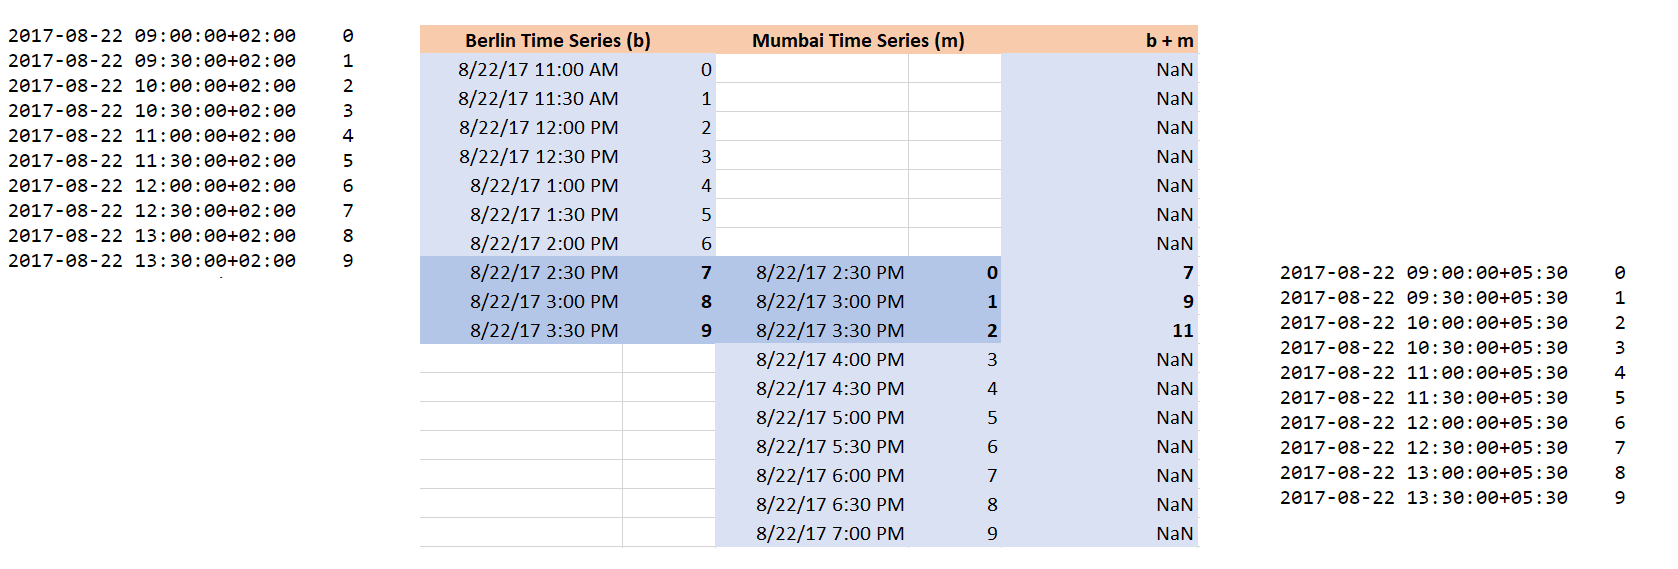

# 7. Shifting and Lagging

https://youtu.be/0lsmdNLNorY

In [89]:

df_fb = pd.read_csv("../data_sets/fb.csv",parse_dates=['Date'],index_col='Date')
df_fb

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [90]:
df_fb.shift(2)

,Price
Date,
2017-08-15,NaN
2017-08-16,NaN
2017-08-17,171.00
2017-08-18,170.00
2017-08-21,166.91
2017-08-22,167.41
2017-08-23,167.78
2017-08-24,169.64
2017-08-25,168.71


In [91]:
df_fb.shift(-1)

,Price
Date,
2017-08-15,170.00
2017-08-16,166.91
2017-08-17,167.41
2017-08-18,167.78
2017-08-21,169.64
2017-08-22,168.71
2017-08-23,167.74
2017-08-24,166.32
2017-08-25,167.24


In [92]:
df_fb['Prev Day Price']=df_fb.shift(1)
df_fb

,Price,Prev Day Price
Date,,
2017-08-15,171.00,NaN
2017-08-16,170.00,171.00
2017-08-17,166.91,170.00
2017-08-18,167.41,166.91
2017-08-21,167.78,167.41
2017-08-22,169.64,167.78
2017-08-23,168.71,169.64
2017-08-24,167.74,168.71
2017-08-25,166.32,167.74


In [93]:
df_fb['1 day change']=df_fb['Price']-df_fb['Prev Day Price']
df_fb

,Price,Prev Day Price,1 day change
Date,,,
2017-08-15,171.00,NaN,NaN
2017-08-16,170.00,171.00,-1.00
2017-08-17,166.91,170.00,-3.09
2017-08-18,167.41,166.91,0.50
2017-08-21,167.78,167.41,0.37
2017-08-22,169.64,167.78,1.86
2017-08-23,168.71,169.64,-0.93
2017-08-24,167.74,168.71,-0.97
2017-08-25,166.32,167.74,-1.42


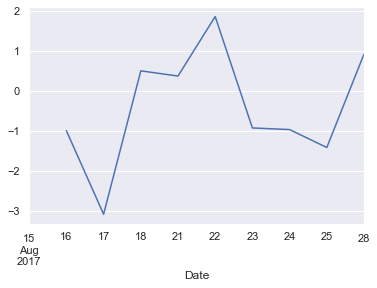

In [94]:
df_fb['1 day change'].plot()

In [95]:
df_fb['5 day %change']=(df_fb['Price']-df_fb['Price'].shift(5))*100/df_fb['Price']
df_fb

,Price,Prev Day Price,1 day change,5 day %change
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.801698
2017-08-23,168.71,169.64,-0.93,-0.764626
2017-08-24,167.74,168.71,-0.97,0.494813
2017-08-25,166.32,167.74,-1.42,-0.655363


# tshift()

In [96]:
df_fb.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [97]:
df_fb.index=pd.date_range(start='2017-08-15',periods=10,freq='B')
df_fb

,Price,Prev Day Price,1 day change,5 day %change
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.801698
2017-08-23,168.71,169.64,-0.93,-0.764626
2017-08-24,167.74,168.71,-0.97,0.494813
2017-08-25,166.32,167.74,-1.42,-0.655363
2017-08-28,167.24,166.32,0.92,-0.322889


In [98]:
df_fb.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', freq='B')

In [100]:
df_fb.tshift(2)

,Price,Prev Day Price,1 day change,5 day %change
2017-08-17,171.00,NaN,NaN,NaN
2017-08-18,170.00,171.00,-1.00,NaN
2017-08-21,166.91,170.00,-3.09,NaN
2017-08-22,167.41,166.91,0.50,NaN
2017-08-23,167.78,167.41,0.37,NaN
2017-08-24,169.64,167.78,1.86,-0.801698
2017-08-25,168.71,169.64,-0.93,-0.764626
2017-08-28,167.74,168.71,-0.97,0.494813
2017-08-29,166.32,167.74,-1.42,-0.655363
2017-08-30,167.24,166.32,0.92,-0.322889


In [101]:
df_fb.tshift(-2)

,Price,Prev Day Price,1 day change,5 day %change
2017-08-11,171.00,NaN,NaN,NaN
2017-08-14,170.00,171.00,-1.00,NaN
2017-08-15,166.91,170.00,-3.09,NaN
2017-08-16,167.41,166.91,0.50,NaN
2017-08-17,167.78,167.41,0.37,NaN
2017-08-18,169.64,167.78,1.86,-0.801698
2017-08-21,168.71,169.64,-0.93,-0.764626
2017-08-22,167.74,168.71,-0.97,0.494813
2017-08-23,166.32,167.74,-1.42,-0.655363
2017-08-24,167.24,166.32,0.92,-0.322889
